Exam 2

Author: Dylan Andrews

Special thanks: Jackson, Madden, Lizebeth, James, Jonathan, and Kiran.

In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [99]:
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [100]:
file_name = 'weather'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [101]:
file_name = 'planes'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [102]:
file_name = 'airports'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [103]:
file_name = 'airlines'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [104]:
# Load the data.
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF = pd.read_csv(file_location)
DF

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 18:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198.0,22.0,0.0,2013-10-01 02:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 16:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 15:00:00


P. Preliminaries(5 points)
Do an initial exploration of the flights data. Report on all the typical things: Variables, Observations, Data Types, Weirdness or NaNs…

Answer: There are 19 variables, and 336,776 Observations.
"year" - Numerical integer
"month" - Numerical integer
"day" - Numerical integer
"dep_time" - Numerical, has some NaN, (float)
"sched_dep_time" - Numerical
"dep_delay" -  Numerical, has some NaN, (float)
"arr_time" -Numerical, has some NaN, (float)
"sched_arr_time" - Numerical
"arr_day' - Numerical, has some NaN
"carrier" - Categorical
"flight" - Categorical
"tailum" - Categorical
"origin" -  Categorical
"dest" - Categorical
"air_time" - Numerical, has some NaN, (float)
"distance" - Numerical, (float)
"hour" - Numerical (float)
"minute" - Numerical (float) 
"time_hour" - Numerical

In [105]:
num_observations = DF.shape[0]
print("Number of observations (rows):", num_observations)

num_variables = DF.shape[1]
print("Number of variables (columns):", num_variables)
# I just used this code to find the number of observations and variables.

Number of observations (rows): 336776
Number of variables (columns): 19


In [106]:
DF.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

Question 1 (5 points)
What are the ten most common destinations for flights from NYC airports in 2013?

Answer: The top ten most common destinations were ORD, ATL, LAX, BOS, MCO, CLT, SFO, FLL, MIA, and DCA.

Make a table (Data Frame) that lists these in descending order of frequency and shows the number of flights heading to each airport.



In [107]:
#Loading the data in

airports = pd.read_csv("https://joannabieri.com/introdatascience/data/airports.csv")
top_destinations = (
    DF["dest"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "Destination", "dest": "Number_of_Flights"})
)
#Takes the destination column, then it counts how many flights go to each destination code, after that it keeps only the top ten. Then it creates a DF.

print("Top 10 most common flight destinations from NYC airports (2013):")
top_destinations

Top 10 most common flight destinations from NYC airports (2013):


,Number_of_Flights,count
0,ORD,17283
1,ATL,17215
2,LAX,16174
3,BOS,15508
4,MCO,14082
5,CLT,14064
6,SFO,13331
7,FLL,12055
8,MIA,11728
9,DCA,9705


In [108]:
 print(airports.columns)

Index(['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], dtype='object')


Question 2 (5 points)
Which airlines have the most flights departing from NYC airports in 2013

Answer: United Airlines has the most flights departing NYC airports in 2013. 

Make a table(Data Frame) that lists these in descending order of frequency and shows the number of flights for each airline. In your narrative mention the names of the airlines as well.

Answer: The busiest airlines to come out of NYC airports in 2013 are United Air Lines (UA): 58,673 flights, JetBlue Airways (B6): 54,635 flights, ExpressJet Airlines (EV): 54,173 flights, Delta Air Lines (DL): 48,110 flights, American Airlines (AA): 32,729 flights

Hint: You can use the airlines dataset to look up the airline name based on carrier code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.



In [109]:
#Loads the data

airports = pd.read_csv("https://joannabieri.com/introdatascience/data/airports.csv")
top_destinations = (
    DF["carrier"]
    .value_counts()
    .head(10)
    .reset_index()
    
)
#Takes the carrier column, then counts how many flights each carrier had, and keeps only the top 10 airlines with the most flights. Then creates a 2-column DF.

print("Top 10 most common flight destinations from NYC airports (2013):")
top_destinations

Top 10 most common flight destinations from NYC airports (2013):


,carrier,count
0,UA,58665
1,B6,54635
2,EV,54173
3,DL,48110
4,AA,32729
5,MQ,26397
6,US,20536
7,9E,18460
8,WN,12275
9,VX,5162


Question 3 (10 points)
Consider only flights that have non-missing arrival delay information and answer the questions below. Your answer should include the name of the carrier in addition to the carrier code and the values asked.

Hint: The easiest way to do this is replace the NaNs in just the ‘arr_delay’ column with some other string, like ‘NA’ and then create a mask, but you could also use some of the more fancy na tools.

a. Which carrier had the highest mean arrival delay?
Answer:F9, Frontier Airlines, had the highest mean arrival delay at 21.9 hours.
b. Which carrier had the lowest mean arrival delay?
Answer: AS, Alaska Airlines, had the lowest mean arrival delay at -9.93 hours.

In [110]:
#Loads data
airlines = pd.read_csv("https://joannabieri.com/introdatascience/data/airlines.csv")
DF_nonmissing = DF[DF['arr_delay'].notna()].copy()

# Calculating mean arrival delay per carrier
mean_delays = DF_nonmissing.groupby('carrier')['arr_delay'].mean().reset_index()

# Merging with the airlines dataset to get carrier names
mean_delays = mean_delays.merge(airlines, on='carrier', how='left')

# Finds the carrier with the highest and lowest mean arrival delay
highest_delay = mean_delays.loc[mean_delays['arr_delay'].idxmax()]
lowest_delay = mean_delays.loc[mean_delays['arr_delay'].idxmin()]

print("Carrier with HIGHEST mean arrival delay:")
print(highest_delay, "\n")
print("Carrier with LOWEST mean arrival delay:")
print(lowest_delay)

Carrier with HIGHEST mean arrival delay:
carrier                          F9
arr_delay                 21.920705
name         Frontier Airlines Inc.
Name: 6, dtype: object 

Carrier with LOWEST mean arrival delay:
carrier                        AS
arr_delay               -9.930889
name         Alaska Airlines Inc.
Name: 2, dtype: object


Question 4 (15 points)
Consider breaking the day into four time intervals: 12:00am-6am, 6:01am-12pm, 12:01pm-6pm, 6:01pm-11:59pm, then answer the questions below.

Hint: the data puts uses the format HHMM or HMM for hours and minutes and uses a 24-hour clock. So 12:01am = 1, 6am = 600,…., 6:01pm = 1801, 12am = 0. We did something similar to this in our homework when we were gathering age groups for our Lego purchasers.

a. Calculate the proportion of flights that are delayed at departure at each of these time intervals.
Answer:
From 12:00 am - 6:00 pm, the proportion of flights delayed at departure is 16.62%
From 6:01 am - 12:00 pm, the proportion of flights delayed at departure is 24.72%
From 12:01 pm - 6:00 pm, the proportion of flights delayed at departure is 44.02%
From 6:01 pm - 11:59 pm, the proportion of flights delayed at departure is 57.03%

b. Comment on how the likelihood of being delayed change throughout the day? What is the probability of being delayed given each time period?

Answer: As the day got later and later, the likelihood that your flight would be delayed quickly increased.From 12:00 am - 6:00 pm, the proportion of flights delayed at departure is 16.62%. From 6:01 am - 12:00 pm, the proportion of flights delayed at departure is 24.72%. From 12:01 pm - 6:00 pm, the proportion of flights delayed at departure is 44.02%. From 6:01 pm - 11:59 pm, the proportion of flights delayed at departure is 57.03%.

In [111]:
#This keeps only the rows where both departure time and departure delay are not NaN.
df = DF[DF['dep_time'].notna() & DF['dep_delay'].notna()].copy()
df['is_delayed'] = (df['dep_delay'] > 0).astype(int)
#Creates a new column called is_delayed.

#This is dividing the day into 4 parts.
bins = [0, 600, 1200, 1800, 2400]
labels = [
    '12:00am - 6:00am',
    '6:01am - 12:00pm',
    '12:01pm - 6:00pm',
    '6:01pm - 11:59pm'
]

# Uses "pandas.cut()" to sort each of the flights into one of the four categories.
df['time_interval'] = pd.cut(
    df['dep_time'],
    bins=bins,
    labels=labels,
    right=True, # Intervals are (min, max], e.g., (600, 1200]
    include_lowest=True
)
#This groups all of the flights by their time interval and finds the average of delayed flights.
proportion_df = (
    df.groupby('time_interval')['is_delayed']
    .mean()
    .mul(100) # Convert to percentage
    .round(2)
    .reset_index()
    .rename(columns={'is_delayed': 'Proportion Delayed (%)'})
)
print("Proportion of Flights Delayed at Departure by Time Interval:")
print(proportion_df)

Proportion of Flights Delayed at Departure by Time Interval:
      time_interval  Proportion Delayed (%)
0  12:00am - 6:00am                   16.62
1  6:01am - 12:00pm                   24.72
2  12:01pm - 6:00pm                   44.02
3  6:01pm - 11:59pm                   57.03


Question 5 (15 points)
Find the flight with the longest air time.

a. How long is this flight?
Answer: This flight was 695 minutes long.
b. What city did it fly to?
Answer: It flew to Honolulu
c. How many seats does the plane that flew this flight have?
Answer:This plane flew with 292 seats.

In [112]:
# Loading DFs
DF = pd.read_csv(BASE_URL + 'flights.csv')
planes = pd.read_csv(BASE_URL + 'planes.csv')
airports = pd.read_csv(BASE_URL + 'airports.csv')
#This finds the flight that spent the most time in the air.
longest_flight_info = DF.loc[DF['air_time'].idxmax()]

# These lines pull out three pieces of information from that flight: air time, airport code, and the plane's ID number. 
max_air_time = longest_flight_info['air_time']
dest_code = longest_flight_info['dest']
tail_number = longest_flight_info['tailnum']
#This looks in the airports data to find which airport matches the destination code.
# Use .iloc[0] to get the specific name string
destination_name = airports[airports['faa'] == dest_code]['name'].iloc[0]
# This looks in the planes dataset for the airplane that has the same tail number. It then takes the number of seats on that plane. 
# Use .iloc[0] to get the specific seat count
seats = planes[planes['tailnum'] == tail_number]['seats'].iloc[0]

print(f"a. How long is this flight?: {max_air_time} minutes")
print(f"b. What city did it fly to?: {destination_name}")
print(f"c. How many seats does the plane that flew this flight have?: {seats}")

a. How long is this flight?: 695.0 minutes
b. What city did it fly to?: Honolulu Intl
c. How many seats does the plane that flew this flight have?: 292


Question 6 (15 pts)
The airports data frame contains information on a large number of primarily American airports. These data include location information for these airports in the form of latitude and longitude coordinates. In this question we limit our focus to the Contiguous United States. Visualize and describe the distribution of the longitudes of airports in the Contiguous United States. What does this tell you about the geographical distribution of these airports?

Answer: There are 1195 airports in the contiguous United States. The highest airport densities are around -85 to -80 degrees. The lowest densities or airports are around -70 degrees. This histogram shows us that most airports are on the East Coast compared to the West Coast.

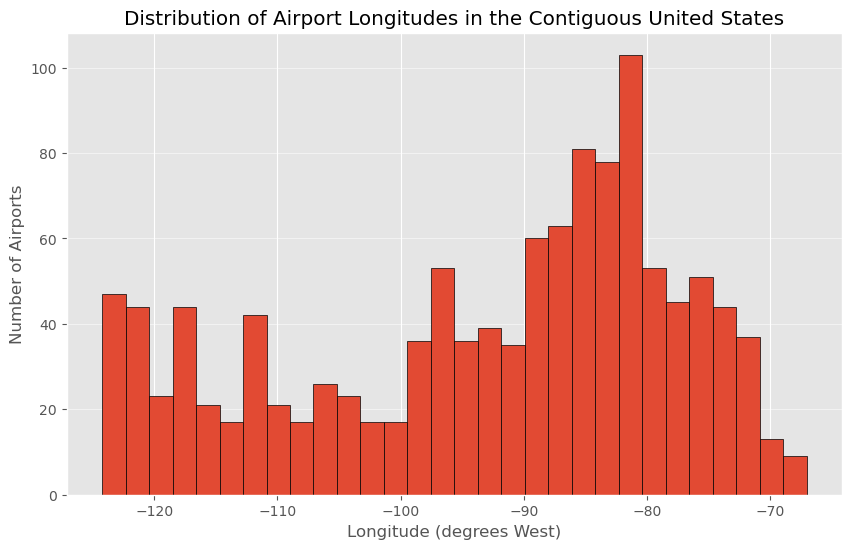

There are 1195 airports in the contiguous United States.


In [113]:
#This line filters the airports dataset to only include airports inside the contiguous U.S. states
contig_us = airports[
    (airports["lon"] > -125) &  # western edge of contiguous U.S.
    (airports["lon"] < -66) &   # eastern edge of contiguous U.S.
    (airports["lat"] > 24) &    # southern border 
    (airports["lat"] < 50)      # northern border 
].copy()
#Creating the histogram.
plt.figure(figsize=(10,6))
plt.hist(contig_us["lon"], bins=30, edgecolor='black')
plt.title("Distribution of Airport Longitudes in the Contiguous United States")
plt.xlabel("Longitude (degrees West)")
plt.ylabel("Number of Airports")
plt.grid(axis='y', alpha=0.5)
plt.show()

print("There are", len(contig_us), "airports in the contiguous United States.")


Question 7 (15 pts)
Recreate the plot included below using the flights data. Do the best you can to get as close as possible to what you see here. Once you have created the visualization, in no more than one paragraph, describe what you think the point of this visualization might be.

Hint: The visualization uses the variable arrival, which is not included in the flights data frame. You will have to create arrival yourself, it is a categorical variable that is equal to "ontime" when arr_delay <= 0 and "delayed" when arr_delay > 0. Hint: I used a lambda with an if else inside.



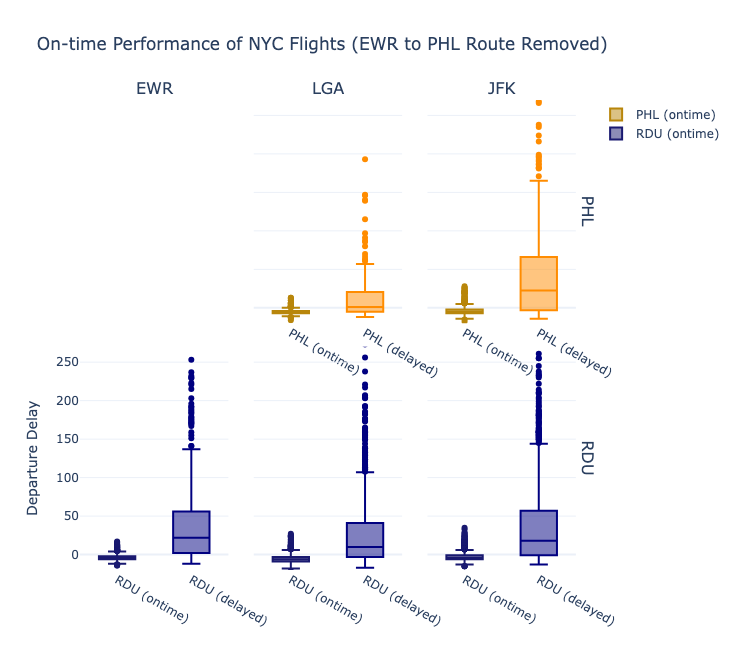

In [114]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Keeps only rows where both arrival delay and departure delay are not missing.
Data = DF[DF['arr_delay'].notna() & DF['dep_delay'].notna()].copy()

#Sorts out data into either delayed or on time. If the delay was greater than 0, it would be put in the delayed column.
Data['arrival'] = Data['arr_delay'].apply(lambda x: 'delayed' if x > 0 else 'ontime')

#Focus only on flights from the three NYC airports, excludes the flight route from EWR to PHL.
origins = ['EWR', 'LGA', 'JFK']
destinations = ['PHL', 'RDU']
routes_to_remove = [('EWR', 'PHL')]
#Keeps only certain rows
df_filtered = Data[
    (Data['origin'].isin(origins)) &
    (Data['dest'].isin(destinations))
].copy()

# Remove the EWR to PHL rows
df_filtered = df_filtered[~df_filtered.set_index(['origin', 'dest']).index.isin(routes_to_remove)].copy()

#Custom colors
def get_color(dest, arrival_status):
    if dest == 'PHL':
        # Dark Yellow for On-time, Orange/Red for Delayed
        return 'darkgoldenrod' if arrival_status == 'ontime' else 'darkorange'
    elif dest == 'RDU':
        # Dark Blue for On-time, Navy for Delayed
        return 'midnightblue' if arrival_status == 'ontime' else 'navy'


#Builds an empty grid of plots
fig = make_subplots(
    rows=2, cols=3,
    shared_yaxes=True,
    column_titles=['EWR', 'LGA', 'JFK'],
    row_titles=['PHL', 'RDU'],
    vertical_spacing=0.05,
    horizontal_spacing=0.05
)

#Each key tells Plotly where each airport pair’s chart goes in the grid.
routes = {
    (1, 2): ('LGA', 'PHL'), (1, 3): ('JFK', 'PHL'), 
    (2, 1): ('EWR', 'RDU'), (2, 2): ('LGA', 'RDU'), (2, 3): ('JFK', 'RDU') 
}

#Loops through each route and adds two boxplots per route, one for on-time flights, and one for delayed flights.
for (row, col), (orig, dest) in routes.items():
    df_route = df_filtered[(df_filtered['origin'] == orig) & (df_filtered['dest'] == dest)]

    for arrival_status in ['ontime', 'delayed']:
        fig.add_trace(
            go.Box(
                y=df_route[df_route['arrival'] == arrival_status]['dep_delay'],
                name=f"{dest} ({arrival_status})",
                boxpoints='outliers',
                marker_color=get_color(dest, arrival_status),
                # Show legend only once per destination row
                showlegend=(row == 1 and col == 2 and arrival_status == 'ontime') or 
                           (row == 2 and col == 1 and arrival_status == 'ontime')
            ),
            row=row, col=col
        )

# Adds a title, sets figure size, and uses a clean white style.
fig.update_layout(
    title_text="On-time Performance of NYC Flights (EWR to PHL Route Removed)",
    height=650,
    width=1000,
    template='plotly_white'
)

# Set Y-axis limits and label
fig.update_yaxes(range=[-20, 270], title_text="Departure Delay", col=1)
fig.update_xaxes(showticklabels=True)
fig.update_xaxes(showticklabels=False, row=1, col=1)
fig.update_yaxes(showticklabels=False, row=1, col=1) 
fig.update_layout(showlegend=True) 

Question 8 (15 pts)
Create your own data visualization that explores delayed flights. Here you are using any or all of the data sets to explore a question related to delayed flights. You are encouraged to come up with your own questions, but here are some ideas:

How does the average departure delay compare for flights with and without a weather delay?

Is there an association between weather and flight delays?
Are large flights or small flights more likely to be late?
Are there certain destinations each month that are most likely to be late?
Can you find a pattern behind why some carriers are often delayed?

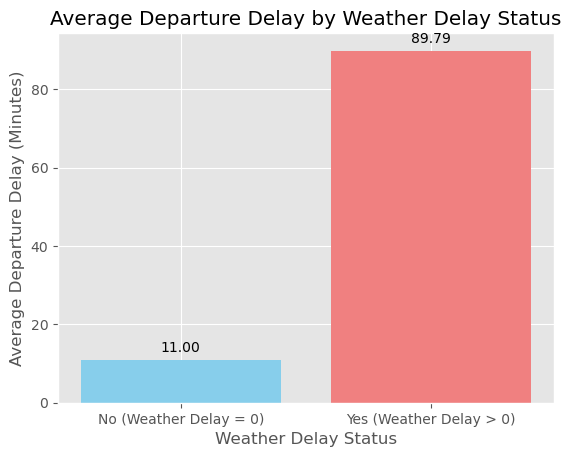

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
df = pd.DataFrame({
    'Weather Delay Status': ['No (Weather Delay = 0)', 'Yes (Weather Delay > 0)'],
    'Average Departure Delay (Minutes)': [11.00, 89.79]
})

# Creating the bar chart
plt.bar(
    df['Weather Delay Status'],
    df['Average Departure Delay (Minutes)'],
    color=['skyblue', 'lightcoral']
)

# Adding title and labels
plt.title('Average Departure Delay by Weather Delay Status')
plt.xlabel('Weather Delay Status')
plt.ylabel('Average Departure Delay (Minutes)')

# Adding numbers on top of bars
for i, val in enumerate(df['Average Departure Delay (Minutes)']):
    plt.text(i, val + 2, f"{val:.2f}", ha='center')

# Displaying the plot
plt.show()
